<a href="https://colab.research.google.com/github/mallibus/TF2---colab/blob/master/Colab_4_Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Installing dependencies and notebook gpu setup

In [0]:
# !pip install tensorflow-gpu==2.0.0.alpha0

## Step 2: Importing the libraries

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

## Step 3: Data Preprocessing

### Loading the Cifar10 dataset

In [0]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [0]:
X_train = X_train / 255.0

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

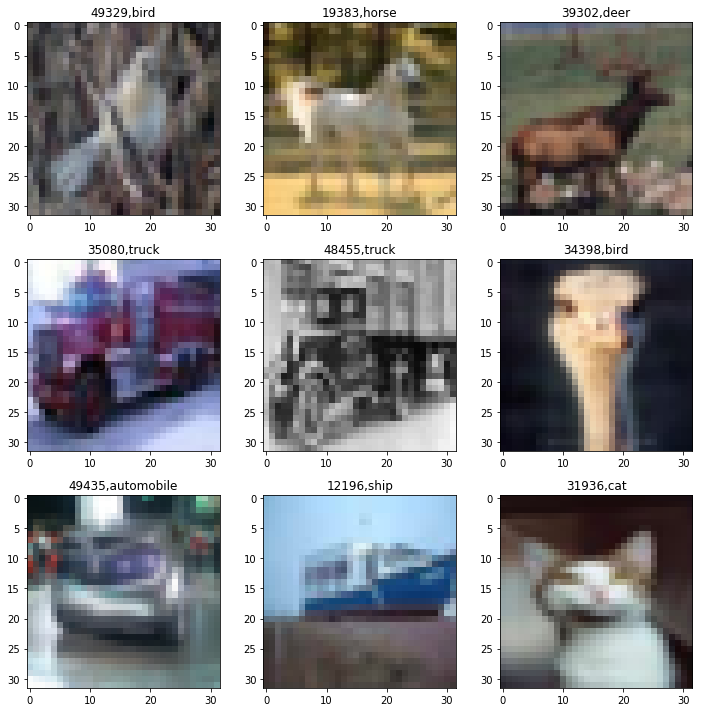

In [43]:
import numpy as np
size = 3
sample = np.random.choice(range(len(X_train)),size*size)
plt.figure(figsize=(10,10))
for i in range(size):
  for j in range(size):
#    print(i,j,i*size+(j+1))
    idx = i*size+j
    plt.subplot(size,size,idx+1)
    plt.title(f'{sample[idx]},{class_names[y_train[sample[idx]][0]]}')  # y_train is a an array of arrays of lenght 1
    #plt.title(f'{sample[idx]}')
    plt.imshow(X_train[sample[idx]])

plt.tight_layout()
plt.show()

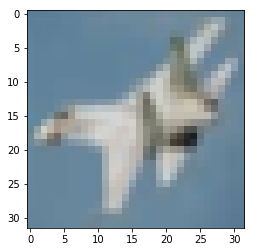

In [44]:
plt.imshow(X_test[10])

## Step 4: Building a Convolutional Neural Network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size: 3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolutional layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [57]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 11s 221us/sample - loss: 1.3675 - sparse_categorical_accuracy: 0.5075
Epoch 2/5
50000/50000 [==============================] - 11s 217us/sample - loss: 0.9134 - sparse_categorical_accuracy: 0.6773
Epoch 3/5
50000/50000 [==============================] - 11s 214us/sample - loss: 0.7343 - sparse_categorical_accuracy: 0.7413
Epoch 4/5
50000/50000 [==============================] - 11s 211us/sample - loss: 0.6011 - sparse_categorical_accuracy: 0.7898
Epoch 5/5
50000/50000 [==============================] - 11s 213us/sample - loss: 0.4922 - sparse_categorical_accuracy: 0.8289


### Evaluating the model

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 116us/sample - loss: 0.8160 - sparse_categorical_accuracy: 0.7337


In [59]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7336999773979187


# HOMEWORK SOLUTION

## Batch normalization on dense layers

First, I worked on the dense part alone, with the following changes:

*   3 dense layers from 1024,256 and 128 neurons
*   Batch normalization layer after each dense layer
*   Dropout layer(0.2) after each batchnorm

# Test accuracy: 0.776

I've seen batch normalization included in some award winning models, so I thought... give it a try

[Keras doc on Batchnormalization](https://keras.io/layers/normalization/)

[Theory of Batch normalization](https://medium.com/@krishna_84429/understanding-batch-normalization-1eaca8f2f63e)


In [110]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, epochs=15)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)            

In [112]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7768999934196472


## Batch normalization on all layers

Then, I added batch normalization after all layers, including convolutional layers

# Test accuracy  0.788



In [113]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, epochs=15)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 16, 16, 64)      

In [114]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7886999845504761


# Explore image batches 

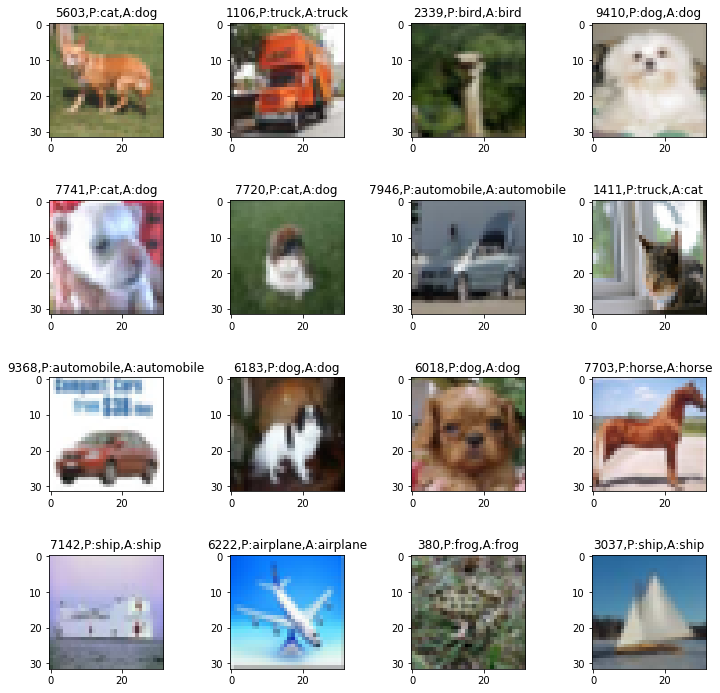

In [121]:
size = 4
sample = np.random.choice(range(len(X_test)),size*size)
predictions = model.predict_classes(X_test[sample])
plt.figure(figsize=(10,10))
for i in range(size):
  for j in range(size):
#    print(i,j,i*size+(j+1))
    idx = i*size+j
    plt.subplot(size,size,idx+1)
    plt.title(f'{sample[idx]},P:{class_names[predictions[idx]]},A:{class_names[y_test[sample[idx]][0]]}')
    plt.imshow(X_test[sample[idx]],cmap='magma')

plt.tight_layout()
plt.show()
